In this notebook is resulting data frame from notebook 01 used and goal is to determine percent for cutt off outlier detection method when several percents compared. In addition to notebook 2 here are crossfeatures added in model training and also checked lower outlier detection with cutoff 0.1. In further work only 0.9 cutoff used for now.

In [1]:
import sys
sys.path.append('../..')
from src.modules.cutoff_rf import *
from src.modules.models_new2 import *
from src.modules.evaluation import *
import matplotlib.pyplot as plt

# Read data

In [2]:
file = '../../results/5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv'
df_o = pd.read_csv(file, index_col=0, parse_dates=True).drop(columns=['N_Ox','S_Ox']) # exclude Ox
df_o

,D_NO2,D_PM10K,N_NO2,N_O3,N_PM10K,O_NO2,O_PM10K,S_NO2,S_O3,S_PM10K,...,Sud_Windspeed,West_RH,West_Temp,West_Winddirection,West_Windspeed,Ost_Pressure,Ost_RH,Ost_Temp,Ost_Winddirection,Ost_Windspeed
2010-01-01,62.420425,48.681210,37.758297,4.000452,34.853405,52.362980,41.291916,45.165530,2.108327,58.876480,...,0.358427,83.031044,3.497470,189.95006,0.326422,NaN,NaN,NaN,NaN,NaN
2010-01-02,49.886177,148.307540,25.938934,4.637932,45.783848,36.956390,76.422780,33.300850,1.795727,169.943600,...,0.279739,86.777100,3.033653,214.33745,0.206639,NaN,NaN,NaN,NaN,NaN
2010-01-03,21.900616,21.664154,11.074873,34.357640,10.978717,15.286636,16.273163,14.216703,30.359385,19.864191,...,1.893668,56.488766,2.953737,278.73930,2.640419,NaN,NaN,NaN,NaN,NaN
2010-01-04,36.261917,21.462568,18.268064,48.127280,14.785930,24.183193,20.439781,26.544174,43.230330,26.680067,...,1.136650,44.811253,-0.571709,285.80966,1.023319,NaN,NaN,NaN,NaN,NaN
2010-01-05,71.757225,53.670230,41.781490,12.211806,32.000100,42.627240,43.426716,51.446163,7.382785,54.818146,...,0.428190,73.859795,-4.016794,198.60895,0.356867,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,33.136486,18.087683,14.935202,47.710407,18.953040,19.609596,14.622527,21.049612,36.083650,15.733115,...,0.673823,57.975098,18.413990,264.72040,0.624361,973.1446,73.206460,18.672241,182.59240,0.435133
2021-07-04,19.907900,14.338615,8.624179,78.167210,15.033513,14.503092,14.373650,13.824055,67.281296,14.214394,...,0.901104,49.535610,21.988039,179.25130,0.576749,972.4365,60.177140,22.199862,130.74823,0.562957
2021-07-05,20.364044,16.338556,16.112087,66.048890,17.262230,12.612704,15.058688,12.696744,70.662820,13.985309,...,0.634559,58.139606,20.624140,174.17639,0.545803,969.7183,71.621360,20.727047,139.74475,0.418278
2021-07-06,24.437843,19.290907,7.977263,71.018890,15.782174,15.851383,17.253944,13.073669,58.211086,14.010532,...,1.140109,57.618786,21.858849,198.03795,0.677458,969.6665,74.613620,21.856710,129.45146,0.462159


# Check on N_NO2 only

In [3]:
df_nno2 = df_o.copy()[['N_NO2','year', 'dayofyear', 'month_Apr', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
                       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep', 
                       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
                       'weekday_Tuesday', 'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer', 
                       'season_winter', 'holiday', 'holiday_school', 'Nord_Precip', 'Nord_Pressure', 'Nord_RH', 'Nord_Temp', 
                       'Nord_Winddirection', 'Nord_Windspeed']]
df_nno2.head(2)

,N_NO2,year,dayofyear,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,season_summer,season_winter,holiday,holiday_school,Nord_Precip,Nord_Pressure,Nord_RH,Nord_Temp,Nord_Winddirection,Nord_Windspeed
2010-01-01,37.758297,2010,1,0,0,0,0,1,0,0,...,0,1,1,1,0.0,953.79370,77.251884,4.035931,89.42938,0.999700
2010-01-02,25.938934,2010,2,0,0,0,0,1,0,0,...,0,1,0,1,0.0,950.12506,81.564156,3.522331,110.14704,0.791805


# Add additional features
* holiday_sunday - 1 if holiday falls on Sunday
* month - month in a year (1 to 12)

In [4]:
df_nno2['holiday_sunday'] = holiday_sunday(df_nno2)
df_nno2['month'] = month(df_nno2)

# Add cross features

In [5]:
df_nno2['c1'] = df_nno2['Nord_Temp'] * df_nno2['Nord_RH']
df_nno2['c2'] = df_nno2.Nord_Temp * df_nno2.Nord_Windspeed
df_nno2['c3'] = df_nno2.Nord_Temp * df_nno2.Nord_Pressure
df_nno2['c4'] = df_nno2.Nord_Temp * df_nno2.Nord_Pressure
df_nno2['c5'] = df_nno2.Nord_Temp * df_nno2.Nord_RH
df_nno2['c6'] = df_nno2.Nord_RH * df_nno2.Nord_Pressure
df_nno2['c7'] = df_nno2.Nord_Temp**2
df_nno2['c8'] = df_nno2.Nord_Pressure**2
df_nno2['c9'] = df_nno2.Nord_RH**2

df_nno2

,N_NO2,year,dayofyear,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,...,month,c1,c2,c3,c4,c5,c6,c7,c8,c9
2010-01-01,37.758297,2010,1,0,0,0,0,1,0,0,...,1,311.783243,4.034720,3849.445180,3849.445180,311.783243,73682.360272,16.288736,909722.422160,5967.853582
2010-01-02,25.938934,2010,2,0,0,0,0,1,0,0,...,1,287.295971,2.789000,3346.655143,3346.655143,287.295971,77496.148613,12.406817,902737.629640,6652.711544
2010-01-03,11.074873,2010,3,0,0,0,0,1,0,0,...,1,176.555023,11.638919,2989.760060,2989.760060,176.555023,54606.683862,9.666530,924702.562004,3224.701699
2010-01-04,18.268064,2010,4,0,0,0,0,1,0,0,...,1,-36.479722,-0.950942,-723.611627,-723.611627,-36.479722,47841.519025,0.551762,948984.198627,2411.853586
2010-01-05,41.781490,2010,5,0,0,0,0,1,0,0,...,1,-268.128898,-2.724377,-3762.001189,-3762.001189,-268.128898,67442.074942,14.956557,946250.733618,4806.795187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-03,14.935202,2021,184,0,0,0,0,0,7,0,...,7,1215.912706,8.583537,17608.963912,17608.963912,1215.912706,65933.831018,324.734095,954860.036296,4552.782510
2021-07-04,8.624179,2021,185,0,0,0,0,0,7,0,...,7,1241.229266,13.391670,20786.344707,20786.344707,1241.229266,56921.636974,453.265590,953242.724622,3399.000771
2021-07-05,16.112087,2021,186,0,0,0,0,0,7,0,...,7,1353.775209,12.843872,19344.410150,19344.410150,1353.775209,66351.722053,394.684299,948115.253686,4643.476626
2021-07-06,7.977263,2021,187,0,0,0,0,0,7,0,...,7,1425.511871,18.402877,21017.614263,21017.614263,1425.511871,64289.477716,466.030518,947878.072254,4360.409916


In [6]:
#df_nno2.to_csv('../../results/df_nno2.csv')

# Random Forest without & with cross features comparison

* Cut off 0.9 percent included

In [7]:
params_gbm ={
    'max_depth':(1, 10),
    'n_estimators':(30, 500)
}

* ## Without cross features

In [8]:
%%time
feat = ['month', 'holiday', 'holiday_school', 'holiday_sunday']
df_pred = rf_prediction(df_o=df_nno2, percent=0.9, randomstate=42, params_gbm=params_gbm, factors=factors_NO2, add_feat=feat)

NO2
DonBosco_ D_
Nord_ N_
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.6536   |  4.371    |  476.8    |
|  2        |  0.7125   |  7.588    |  311.4    |
|  3        |  0.5382   |  2.404    |  103.3    |
|  4        |  0.5371   |  1.523    |  437.1    |
|  5        |  0.6969   |  6.41     |  362.8    |
|  6        |  0.4361   |  1.185    |  485.9    |
|  7        |  0.7116   |  8.492    |  129.8    |
|  8        |  0.6096   |  2.636    |  116.2    |
|  9        |  0.6532   |  3.738    |  276.6    |
|  10       |  0.6799   |  4.888    |  166.9    |
|  11       |  0.6799   |  4.773    |  166.9    |
|  12       |  0.6964   |  6.344    |  303.6    |
|  13       |  0.7136   |  9.382    |  139.1    |
|  14       |  0.434    |  1.072    |  136.3    |
|  15       |  0.5375   |  2.383    |  308.7    |
{'max_depth': 9, 'n_estimators': 139, 'random_state': 42}
Ost_ O_
Sud_ S_
West_ W_
Wall time: 1min 29s


In [15]:
print(r2_score(df_pred['N_NO2'], df_pred['N_NO2_pred']))
df_pred

0.5910148380603251


,N_NO2,N_NO2_pred
2020-01-03,39.334070,38.040556
2020-01-04,43.032360,37.958203
2020-01-05,35.747350,32.495296
2020-01-06,13.998880,19.891166
2020-01-07,30.543589,36.119330
...,...,...
2020-03-06,23.931540,24.726573
2020-03-07,30.731730,25.392228
2020-03-08,18.303322,23.608200
2020-03-09,16.569525,19.750725


* ## With cross features

In [13]:
featur_cross = ['month', 'holiday', 'holiday_school', 'holiday_sunday',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
df_pred_cross = rf_prediction(df_o=df_nno2, percent=0.9, randomstate=42, params_gbm=params_gbm, factors=factors_NO2, add_feat=featur_cross)

NO2
DonBosco_ D_
Nord_ N_
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.6529   |  4.371    |  476.8    |
|  2        |  0.7123   |  7.588    |  311.4    |
|  3        |  0.5387   |  2.404    |  103.3    |
|  4        |  0.5373   |  1.523    |  437.1    |
|  5        |  0.6964   |  6.41     |  362.8    |
|  6        |  0.436    |  1.185    |  485.9    |
|  7        |  0.712    |  8.492    |  129.8    |
|  8        |  0.6093   |  2.636    |  116.2    |
|  9        |  0.6525   |  3.738    |  276.6    |
|  10       |  0.6796   |  4.888    |  166.9    |
|  11       |  0.6796   |  4.773    |  166.9    |
|  12       |  0.715    |  9.718    |  137.5    |
|  13       |  0.4346   |  1.0      |  135.7    |
|  14       |  0.7157   |  9.508    |  316.4    |
|  15       |  0.6088   |  3.028    |  316.2    |
{'max_depth': 10, 'n_estimators': 316, 'random_state': 42}
Ost_ O_
Sud_ S_
West_ W_


In [14]:
print(r2_score(df_pred_cross['N_NO2'], df_pred_cross['N_NO2_pred']))
df_pred_cross

0.5821034947423772


,N_NO2,N_NO2_pred
2020-01-03,39.334070,37.949835
2020-01-04,43.032360,38.046669
2020-01-05,35.747350,34.085696
2020-01-06,13.998880,20.727725
2020-01-07,30.543589,35.284425
...,...,...
2020-03-06,23.931540,23.423600
2020-03-07,30.731730,25.539631
2020-03-08,18.303322,23.410556
2020-03-09,16.569525,19.541945


# Comparison when cut off low 0.1 included

* Apply cut off 0.1, cut off 0.9 is incorporated in random forest prediction function

In [16]:
def cut_off_low(df, percent):
    df = df.copy()
    cols = [k for k in [i + j for j in factors for i in add_names.keys()]
            if k in df.columns]
    targets = df[cols]
    quantiles = targets.quantile(percent)
    for c in cols:
        df[c] = [i if i > quantiles[c] else quantiles[c] for i in df[c]]
    return df

In [17]:
df_nno2_01 = cut_off_low(df_nno2, 0.1)

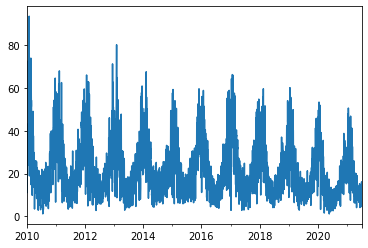

<AxesSubplot:>

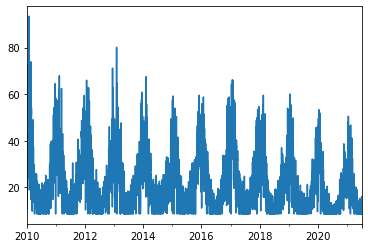

In [18]:
# check if it is low cut off
df_nno2.N_NO2.plot()
plt.show()
df_nno2_01.N_NO2.plot()

* ## Without cross features

In [19]:
%%time
feat = ['month', 'holiday', 'holiday_school', 'holiday_sunday']
df_pred_01 = rf_prediction(df_o=df_nno2_01, percent=0.9, randomstate=42, params_gbm=params_gbm, factors=factors_NO2, add_feat=feat)

NO2
DonBosco_ D_
Nord_ N_
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.6553   |  4.371    |  476.8    |
|  2        |  0.7101   |  7.588    |  311.4    |
|  3        |  0.5433   |  2.404    |  103.3    |
|  4        |  0.5427   |  1.523    |  437.1    |
|  5        |  0.6959   |  6.41     |  362.8    |
|  6        |  0.4423   |  1.185    |  485.9    |
|  7        |  0.7088   |  8.492    |  129.8    |
|  8        |  0.6128   |  2.636    |  116.2    |
|  9        |  0.6551   |  3.738    |  276.6    |
|  10       |  0.6807   |  4.888    |  166.9    |
|  11       |  0.6807   |  4.773    |  166.9    |
|  12       |  0.7126   |  9.391    |  303.9    |
|  13       |  0.442    |  1.0      |  305.8    |
|  14       |  0.7128   |  9.976    |  308.0    |
|  15       |  0.7129   |  10.0     |  317.1    |
{'max_depth': 10, 'n_estimators': 317, 'random_state': 42}
Ost_ O_
Sud_ S_
West_ W_
Wall time: 2min 2s


In [20]:
print(r2_score(df_pred_01['N_NO2'], df_pred_01['N_NO2_pred']))
df_pred_01

0.6050163395584858


,N_NO2,N_NO2_pred
2020-01-03,39.334070,38.430160
2020-01-04,43.032360,38.092551
2020-01-05,35.747350,32.606661
2020-01-06,13.998880,20.112420
2020-01-07,30.543589,36.147447
...,...,...
2020-03-06,23.931540,24.164853
2020-03-07,30.731730,25.782064
2020-03-08,18.303322,24.022980
2020-03-09,16.569525,20.578138


* ## With cross features

In [21]:
featur_cross = ['month', 'holiday', 'holiday_school', 'holiday_sunday',
                'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']
df_pred_cross_01 = rf_prediction(df_o=df_nno2_01, percent=0.9, randomstate=42, params_gbm=params_gbm, factors=factors_NO2, add_feat=featur_cross)

NO2
DonBosco_ D_
Nord_ N_
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.6544   |  4.371    |  476.8    |
|  2        |  0.7102   |  7.588    |  311.4    |
|  3        |  0.5439   |  2.404    |  103.3    |
|  4        |  0.5431   |  1.523    |  437.1    |
|  5        |  0.6955   |  6.41     |  362.8    |
|  6        |  0.4422   |  1.185    |  485.9    |
|  7        |  0.7091   |  8.492    |  129.8    |
|  8        |  0.6123   |  2.636    |  116.2    |
|  9        |  0.6542   |  3.738    |  276.6    |
|  10       |  0.6796   |  4.888    |  166.9    |
|  11       |  0.6796   |  4.773    |  166.9    |
|  12       |  0.7121   |  9.39     |  303.9    |
|  13       |  0.442    |  1.0      |  305.8    |
|  14       |  0.7128   |  9.976    |  308.0    |
|  15       |  0.7128   |  10.0     |  317.1    |
{'max_depth': 10, 'n_estimators': 308, 'random_state': 42}
Ost_ O_
Sud_ S_
West_ W_


In [22]:
print(r2_score(df_pred_cross_01['N_NO2'], df_pred_cross_01['N_NO2_pred']))
df_pred_cross_01

0.590466237619756


,N_NO2,N_NO2_pred
2020-01-03,39.334070,37.934872
2020-01-04,43.032360,38.051512
2020-01-05,35.747350,34.067851
2020-01-06,13.998880,20.471725
2020-01-07,30.543589,35.497480
...,...,...
2020-03-06,23.931540,23.765150
2020-03-07,30.731730,25.053950
2020-03-08,18.303322,23.794640
2020-03-09,16.569525,20.280817


# Overview of r2 score and mean absolute error

* R2 and MAE without cross features better
* cut off 0.1 added to cut off 0.9 leads to better R2 and MAE

In [23]:
print('R2 with cut off 0.9, without cross features:', r2_score(df_pred['N_NO2'], df_pred['N_NO2_pred']))
print('R2 with cut off 0.9, with cross features:', r2_score(df_pred_cross['N_NO2'], df_pred_cross['N_NO2_pred']))
print('R2 with cut off 0.9 and 0.1, without cross features:', r2_score(df_pred_01['N_NO2'], df_pred_01['N_NO2_pred']))
print('R2 with cut off 0.9 and 0.1, with cross features:', r2_score(df_pred_cross_01['N_NO2'], df_pred_cross_01['N_NO2_pred']))

print('MAE with cut off 0.9, without cross features:', mean_absolute_error(df_pred['N_NO2'], df_pred['N_NO2_pred']))
print('MAE with cut off 0.9, with cross features:', mean_absolute_error(df_pred_cross['N_NO2'], df_pred_cross['N_NO2_pred']))
print('MAE with cut off 0.9 and 0.1, without cross features:', mean_absolute_error(df_pred_01['N_NO2'], df_pred_01['N_NO2_pred']))
print('MAE with cut off 0.9 and 0.1, with cross features:', mean_absolute_error(df_pred_cross_01['N_NO2'], df_pred_cross_01['N_NO2_pred']))

R2 with cut off 0.9, without cross features: 0.5910148380603251
R2 with cut off 0.9, with cross features: 0.5821034947423772
R2 with cut off 0.9 and 0.1, without cross features: 0.6050163395584858
R2 with cut off 0.9 and 0.1, with cross features: 0.590466237619756
MAE with cut off 0.9, without cross features: 5.600285877428277
MAE with cut off 0.9, with cross features: 5.692746365019863
MAE with cut off 0.9 and 0.1, without cross features: 5.459406396460487
MAE with cut off 0.9 and 0.1, with cross features: 5.593304973360749


## Export

In [24]:
df_pred.to_csv('../../results/df_pred_03_cutoff09_cross_without.csv')
df_pred_01.to_csv('../../results/df_pred_03_cutoff0901_cross_without.csv')
df_pred_cross.to_csv('../../results/df_pred_03_cutoff09_cross_with.csv')
df_pred_cross_01.to_csv('../../results/df_pred_03_cutoff0901_cross_with.csv')